In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | marabba
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | bulaevo
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | vila
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | nuuk
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | juazeiro
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | manzil tamim
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bireun
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | christia

Processing Record 38 of Set 4 | sitka
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | kokomo
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | porto novo
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | ukiah
Processing Record 47 of Set 4 | totness
Processing Record 48 of Set 4 | solnechnyy
Processing Record 49 of Set 4 | antropovo
Processing Record 50 of Set 4 | roebourne
Processing Record 1 of Set 5 | lokosovo
Processing Record 2 of Set 5 | puerto montt
Processing Record 3 of Set 5 | novopavlovka
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | poya
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | kyshtovka
Processing Record 8 of Set 5 | gamboma
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | vestmannaeyja

City not found. Skipping...
Processing Record 30 of Set 8 | hun
Processing Record 31 of Set 8 | kargasok
Processing Record 32 of Set 8 | samaipata
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | teknaf
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | dingle
Processing Record 38 of Set 8 | sundargarh
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | soller
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | asosa
Processing Record 45 of Set 8 | larap
Processing Record 46 of Set 8 | muroto
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | neuquen
Processing Record 49 of Set 8 | biskupiec
Processing Record 50 of Set 8 | skagen
Processing Record 1 of Set 9 | mount isa
Processing Record 2 of Set 9 | nevelsk
Processing Record 3 of Set 9 | namibe
Processing Record 4 of 

Processing Record 21 of Set 12 | rassvet
Processing Record 22 of Set 12 | xiangfan
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | ballina
Processing Record 25 of Set 12 | ozgon
City not found. Skipping...
Processing Record 26 of Set 12 | samarai
Processing Record 27 of Set 12 | jiwani
Processing Record 28 of Set 12 | semenivka
Processing Record 29 of Set 12 | cam ranh
Processing Record 30 of Set 12 | aklavik
Processing Record 31 of Set 12 | zanzibar
Processing Record 32 of Set 12 | mehran
Processing Record 33 of Set 12 | el badari
City not found. Skipping...
Processing Record 34 of Set 12 | pathein
Processing Record 35 of Set 12 | saint-augustin
Processing Record 36 of Set 12 | huazolotitlan
City not found. Skipping...
Processing Record 37 of Set 12 | rio grande
Processing Record 38 of Set 12 | kutum
Processing Record 39 of Set 12 | santa catarina de tepehuanes
Processing Record 40 of Set 12 | ambulu
Processing Record 41 of Set 12 | bintulu
Processing Record 42 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-04-25 22:29:24,-34.5322,20.0403,55.40,94,100,3.44
1,Marabba,SD,2021-04-25 22:29:25,12.3500,32.1833,87.58,43,100,16.28
2,Hobart,AU,2021-04-25 22:26:01,-42.8794,147.3294,57.99,58,75,17.27
3,Bulaevo,KZ,2021-04-25 22:29:26,54.9056,70.4439,43.07,85,50,6.24
4,Atuona,PF,2021-04-25 22:29:27,-9.8000,-139.0333,79.99,73,44,15.03
5,Mar Del Plata,AR,2021-04-25 22:29:28,-38.0023,-57.5575,62.01,72,40,6.91
6,Rawson,AR,2021-04-25 22:29:28,-43.3002,-65.1023,62.19,55,80,22.68
7,Vila,PT,2021-04-25 22:29:29,42.0304,-8.1588,53.01,93,69,1.88
8,Albany,US,2021-04-25 22:25:50,42.6001,-73.9662,60.01,47,86,3.00
9,Nuuk,GL,2021-04-25 22:29:30,64.1835,-51.7216,41.00,75,75,3.44


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

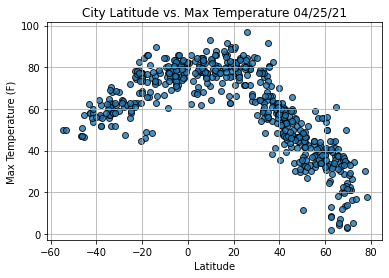

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


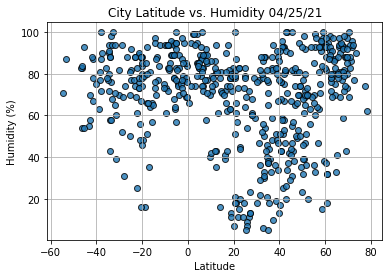

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


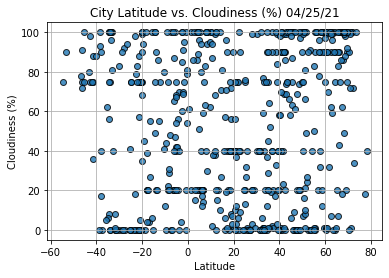

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


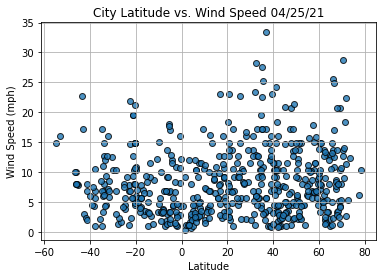

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Marabba,SD,2021-04-25 22:29:25,12.3500,32.1833,87.58,43,100,16.28
3,Bulaevo,KZ,2021-04-25 22:29:26,54.9056,70.4439,43.07,85,50,6.24
7,Vila,PT,2021-04-25 22:29:29,42.0304,-8.1588,53.01,93,69,1.88
8,Albany,US,2021-04-25 22:25:50,42.6001,-73.9662,60.01,47,86,3.00
9,Nuuk,GL,2021-04-25 22:29:30,64.1835,-51.7216,41.00,75,75,3.44


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

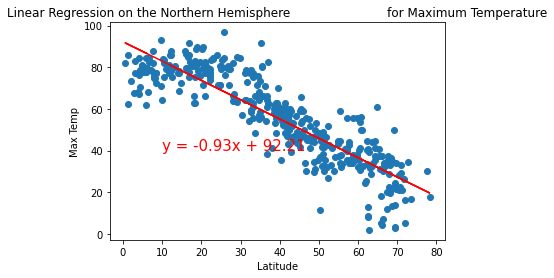

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

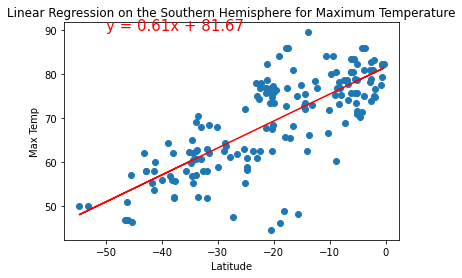

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

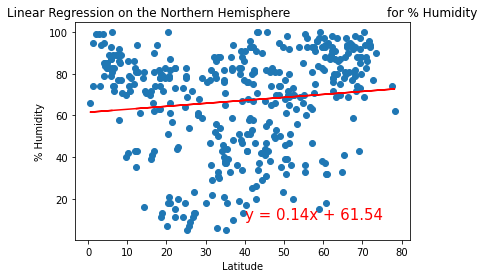

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

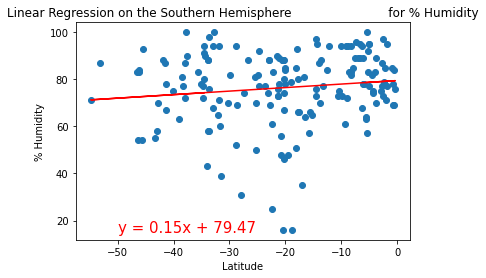

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

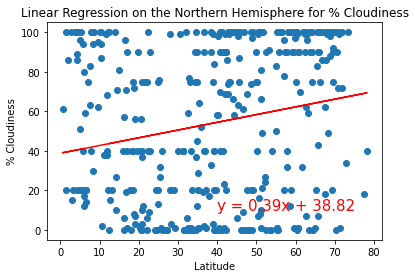

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

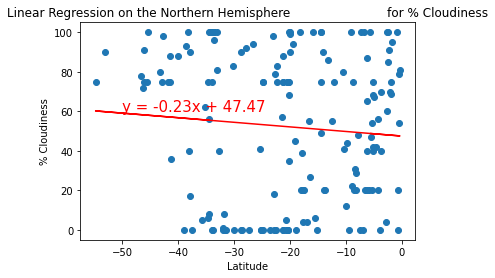

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


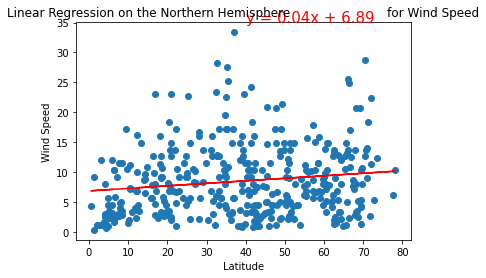

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

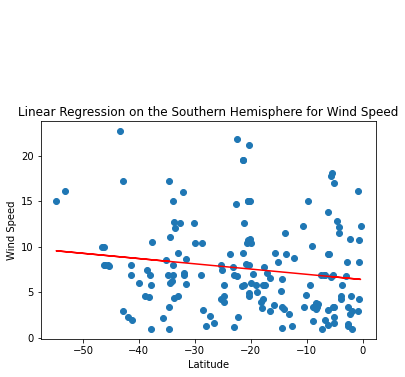

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
plt.